In [51]:
from sklearn.preprocessing import normalize
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import Birch

In [52]:
def read_csv(a, b, path, scaling):
    x = []
    y = []
    users = []
    x_label = ""
    y_label = ""
    reader = ''
    with open(path) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        lines = 0
        for row in reader:
            if lines >= 1:
                #print(', '.join(row))
                x.append(float(row[a]))
                y.append(float(row[b]))
                users.append(row[0])
                lines += 1
            else:
                x_label = row[a]
                y_label = row[b]
                #print(', '.join(row))
                lines += 1
    
    og_x, og_y = x, y
    if(scaling == "std"):
        x, y = (np.array(x) - np.array(x).mean())/(np.array(x).std()), (np.array(y) - np.array(y).mean())/(np.array(y).std())
    elif(scaling == "norm"):
        x, y = normalize(np.array(x)[:, np.newaxis], axis=0).ravel(), normalize(np.array(y)[:, np.newaxis], axis=0).ravel()
    
    return x, y, x_label, y_label, users, pd.read_csv(path),og_x, og_y


# Choose Category
a, b = 2, 10  # 1,9  2,10  6,10 # DBSCAN 5,7
x, y, x_label, y_label, users, csv_data, og_x, og_y = read_csv(a, b, 'tripadvisor_review.csv', 'std')

X = np.array(list(zip(x, y))).reshape(len(x), 2)

In [53]:
bclust=Birch(branching_factor=200, threshold = 1).fit(X)
print(bclust)

labels = bclust.predict(X) 

Birch(branching_factor=200, threshold=1)


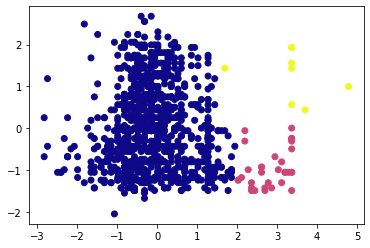

In [54]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='plasma')
plt.show() 

In [55]:
from collections import Counter, defaultdict
print("\nNumber of Users in each cluster:")

count_labels = Counter(labels)

clust_num = len(count_labels)

# Get cluster indices
clusters_indices = defaultdict(list)
for index, c in enumerate(labels):
    clusters_indices[c].append(index)

# Print countries in each cluster and means
x = 0
while x < clust_num:
    print("\nCluster " + str(x + 1))
    print(f"Total Users : {count_labels[x]}")
    print("----------")
    print(f"User | Category {a} | Category {b}")
    sum_x, sum_y, n = 0, 0, 0
    for i in clusters_indices[x]:
        n += 1
        sum_x += og_x[i]
        sum_y += og_y[i]
        print(f'{users[i]} <> {og_x[i]} <> {og_y[i]}')

    print("----------")
    print(f"Mean Category {a} = {sum_x/n} [Cluster {str(x + 1)}]")
    print(f"Mean Category {b} = {sum_y/n} [Cluster {str(x + 1)}]")
    print("----------")
    x+=1


Number of Users in each cluster:

Cluster 1
Total Users : 940
----------
User | Category 2 | Category 10
User 1 <> 1.8 <> 2.42
User 2 <> 2.2 <> 2.32
User 3 <> 0.8 <> 2.5
User 4 <> 1.8 <> 2.86
User 5 <> 1.2 <> 2.54
User 6 <> 1.28 <> 3.66
User 7 <> 1.36 <> 3.22
User 8 <> 1.4 <> 2.88
User 9 <> 1.76 <> 2.54
User 10 <> 1.36 <> 3.12
User 11 <> 1.0 <> 2.62
User 13 <> 1.44 <> 2.34
User 14 <> 1.64 <> 2.74
User 15 <> 1.68 <> 2.46
User 17 <> 1.04 <> 2.98
User 18 <> 1.96 <> 2.42
User 19 <> 1.36 <> 2.8
User 20 <> 1.04 <> 2.48
User 21 <> 1.44 <> 2.94
User 22 <> 1.44 <> 3.22
User 23 <> 1.16 <> 3.66
User 24 <> 1.44 <> 3.04
User 25 <> 0.96 <> 2.46
User 27 <> 1.68 <> 2.38
User 28 <> 1.28 <> 2.4
User 29 <> 1.2 <> 2.94
User 30 <> 1.16 <> 2.46
User 31 <> 1.28 <> 2.34
User 32 <> 2.24 <> 2.42
User 33 <> 2.0 <> 2.72
User 34 <> 1.12 <> 2.74
User 35 <> 1.16 <> 3.02
User 36 <> 0.96 <> 2.94
User 37 <> 1.28 <> 2.9
User 38 <> 1.36 <> 3.2
User 39 <> 1.52 <> 2.58
User 40 <> 1.08 <> 2.42
User 41 <> 1.24 <> 3.06
User 